In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [4]:
train='nsl-kdd/KDDTrain+.txt'
test='nsl-kdd/KDDTest+.txt'
test21='nsl-kdd/KDDTest-21.txt'
train_data=pd.read_csv(train,names=feature)

In [5]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

In [7]:
# number of attack labels 
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [8]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [9]:
change_label(train_data)

In [10]:
# distribution of attack classes
train_data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [11]:
data = train_data.copy()

In [12]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])
data['service']= label_encoder.fit_transform(data['service'])
data['flag']= label_encoder.fit_transform(data['flag'])
data['label']= label_encoder.fit_transform(data['label'])

data['protocol_type'].unique()
data['service'].unique()
data['flag'].unique()
data['label'].unique()

array([4, 0, 2, 1, 3], dtype=int64)

In [13]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4


In [14]:
X = data.drop(["label"],axis =1)
y = data["label"]

# Original Data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100778, 41), (100778,), (25195, 41), (25195,))

In [16]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
mae = []
mct = []
pcsc = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    mae.append(round(e, 3))
    mct.append(round(f, 3))
    pcsc.append(round(g, 3))

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, matthews_corrcoef
from scipy.stats import pearsonr

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf = RandomForestClassifier(random_state=100)

# fit the model 
rf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')
rf_mae = mean_absolute_error(y_pred, y_test)
rf_mcc = matthews_corrcoef(y_pred, y_test)
rf_corr, _ = pearsonr(y_pred, y_test)

storeResults('Random Forest Classifier - Original Data',rf_acc,rf_prec,rf_rec,rf_f1,rf_mae,rf_mcc,rf_corr)

# XGBoost

In [19]:
from xgboost import XGBClassifier

# instantiate the model 
xgb = XGBClassifier(random_state=0)

# fit the model 
xgb.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')
xgb_mae = mean_absolute_error(y_pred, y_test)
xgb_mcc = matthews_corrcoef(y_pred, y_test)
xgb_corr, _ = pearsonr(y_pred, y_test)

storeResults('XGBoost - Original Data',xgb_acc,xgb_prec,xgb_rec,xgb_f1,xgb_mae,xgb_mcc,xgb_corr)

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model 
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')
knn_mae = mean_absolute_error(y_pred, y_test)
knn_mcc = matthews_corrcoef(y_pred, y_test)
knn_corr, _ = pearsonr(y_pred, y_test)

storeResults('KNN  - Original Data',knn_acc,knn_prec,knn_rec,knn_f1,knn_mae,knn_mcc,knn_corr)

# MLP

In [21]:
from sklearn.neural_network import MLPClassifier

# instantiate the model 
mlp = MLPClassifier(random_state=1, max_iter=300)

# fit the model 
mlp.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test,average='weighted')
mlp_rec = recall_score(y_pred, y_test,average='weighted')
mlp_f1 = f1_score(y_pred, y_test,average='weighted')
mlp_mae = mean_absolute_error(y_pred, y_test)
mlp_mcc = matthews_corrcoef(y_pred, y_test)
mlp_corr, _ = pearsonr(y_pred, y_test)

storeResults('MLP Classifier - Original Data',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_mae,mlp_mcc,mlp_corr)

# Stacking Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('et', ExtraTreesClassifier(n_estimators=1000))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_mae = mean_absolute_error(y_pred, y_test)
stac_mcc = matthews_corrcoef(y_pred, y_test)
stac_corr, _ = pearsonr(y_pred, y_test)

storeResults('Stacking Classifier - Original Data',stac_acc,stac_prec,stac_rec,stac_f1,stac_mae,stac_mcc,stac_corr)

# Voting Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_mae = mean_absolute_error(y_pred, y_test)
vot_mcc = matthews_corrcoef(y_pred, y_test)
vot_corr, _ = pearsonr(y_pred, y_test)

storeResults('Voting Classifier - Original Data',vot_acc,vot_prec,vot_rec,vot_f1,vot_mae,vot_mcc,vot_corr)

# CCMI Feature

In [24]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [25]:
selector = SelectPercentile(mutual_info_classif, percentile=30)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

(125973, 12)

In [26]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate']

In [27]:
df = data[['service',
             'flag',
             'src_bytes',
             'dst_bytes',
             'count',
             'serror_rate',
             'same_srv_rate',
             'diff_srv_rate',
             'dst_host_srv_count',
             'dst_host_same_srv_rate',
             'dst_host_diff_srv_rate',
             'dst_host_serror_rate',
             'label']]
df.to_csv('processed.csv')

In [4]:
df = pd.read_csv('processed.csv')
del df['Unnamed: 0']

In [5]:
X = df[['service',
             'flag',
             'src_bytes',
             'dst_bytes',
             'count',
             'serror_rate',
             'same_srv_rate',
             'diff_srv_rate',
             'dst_host_srv_count',
             'dst_host_same_srv_rate',
             'dst_host_diff_srv_rate',
             'dst_host_serror_rate']]
y = df['label']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100778, 12), (100778,), (25195, 12), (25195,))

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model 
rf1 = RandomForestClassifier(random_state=100)

# fit the model 
rf1.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = rf1.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')
rf_mae = mean_absolute_error(y_pred, y_test)
rf_mcc = matthews_corrcoef(y_pred, y_test)
rf_corr, _ = pearsonr(y_pred, y_test)

storeResults('Random Forest Classifier - CCMI',rf_acc,rf_prec,rf_rec,rf_f1,rf_mae,rf_mcc,rf_corr)

# XGBoost

In [31]:
from xgboost import XGBClassifier

# instantiate the model 
xgb1 = XGBClassifier(random_state=0)

# fit the model 
xgb1.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = xgb1.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')
xgb_mae = mean_absolute_error(y_pred, y_test)
xgb_mcc = matthews_corrcoef(y_pred, y_test)
xgb_corr, _ = pearsonr(y_pred, y_test)

storeResults('XGBoost - CCMI',xgb_acc,xgb_prec,xgb_rec,xgb_f1,xgb_mae,xgb_mcc,xgb_corr)

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model 
knn1 = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn1.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = knn1.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')
knn_mae = mean_absolute_error(y_pred, y_test)
knn_mcc = matthews_corrcoef(y_pred, y_test)
knn_corr, _ = pearsonr(y_pred, y_test)

storeResults('KNN  - CCMI',knn_acc,knn_prec,knn_rec,knn_f1,knn_mae,knn_mcc,knn_corr)

# MLP

In [33]:
from sklearn.neural_network import MLPClassifier

# instantiate the model 
mlp1 = MLPClassifier(random_state=1, max_iter=300)

# fit the model 
mlp1.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = mlp1.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test,average='weighted')
mlp_rec = recall_score(y_pred, y_test,average='weighted')
mlp_f1 = f1_score(y_pred, y_test,average='weighted')
mlp_mae = mean_absolute_error(y_pred, y_test)
mlp_mcc = matthews_corrcoef(y_pred, y_test)
mlp_corr, _ = pearsonr(y_pred, y_test)

storeResults('MLP Classifier - CCMI',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_mae,mlp_mcc,mlp_corr)

# Stacking Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('et', ExtraTreesClassifier(n_estimators=1000))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)

stac_acc = (accuracy_score(y_pred, y_test))
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_mae = mean_absolute_error(y_pred, y_test)
stac_mcc = matthews_corrcoef(y_pred, y_test)
stac_corr, _ = pearsonr(y_pred, y_test)

storeResults('Stacking Classifier - CCMI',stac_acc,stac_prec,stac_rec,stac_f1,stac_mae,stac_mcc,stac_corr)

# Voting Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()

eclf2 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)

vot_acc = (accuracy_score(y_pred, y_test))
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_mae = mean_absolute_error(y_pred, y_test)
vot_mcc = matthews_corrcoef(y_pred, y_test)
vot_corr, _ = pearsonr(y_pred, y_test)

#storeResults('Voting Classifier - CCMI',vot_acc,vot_prec,vot_rec,vot_f1,vot_mae,vot_mcc,vot_corr)

# Comparison

In [36]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score,
                        'MAE' : mae,
                        'MCT' : mct,
                        'Pearson Coeff. Correlation' : pcsc
                      })

In [37]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score,MAE,MCT,Pearson Coeff. Correlation
0,Random Forest Classifier - Original Data,0.999,0.999,0.999,0.999,0.003,0.998,0.999
1,XGBoost - Original Data,0.999,0.999,0.999,0.999,0.003,0.998,0.999
2,KNN - Original Data,0.994,0.995,0.994,0.994,0.012,0.990,0.996
3,MLP Classifier - Original Data,0.982,0.982,0.982,0.982,0.048,0.968,0.980
4,Stacking Classifier - Original Data,0.998,0.998,0.998,0.998,0.006,0.996,0.998
5,Voting Classifier - Original Data,0.998,0.999,0.998,0.999,0.004,0.997,0.998
6,Random Forest Classifier - CCMI,0.998,0.999,0.998,0.999,0.003,0.997,0.999
7,XGBoost - CCMI,0.999,0.999,0.999,0.999,0.003,0.998,0.999
8,KNN - CCMI,0.995,0.995,0.995,0.995,0.010,0.991,0.997
9,MLP Classifier - CCMI,0.944,0.948,0.944,0.946,0.167,0.903,0.924


# Graph

In [38]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

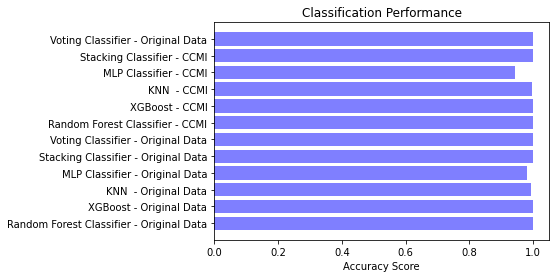

In [39]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

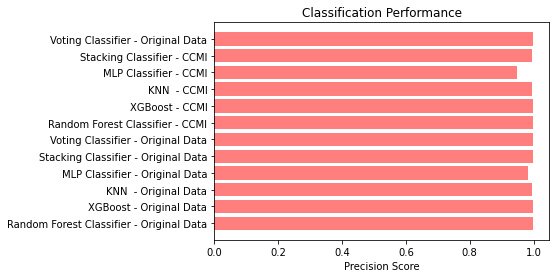

In [40]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

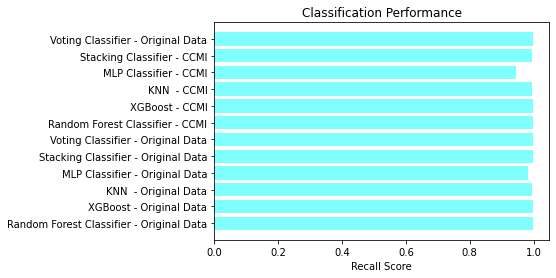

In [41]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

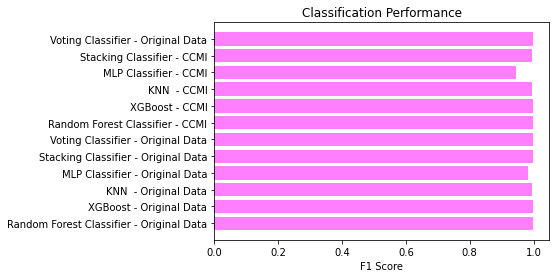

In [42]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# MAE

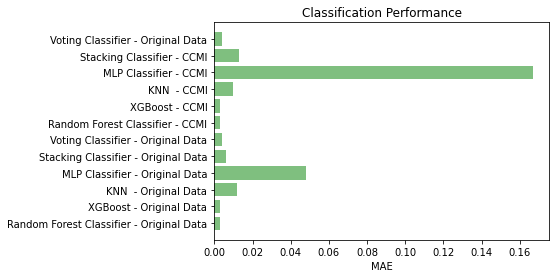

In [43]:
plt2.barh(y_pos, mae, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MAE')
plt2.title('Classification Performance')
plt2.show()

# MCT

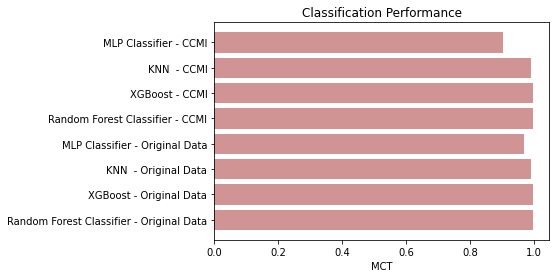

In [40]:
plt2.barh(y_pos, mct, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCT')
plt2.title('Classification Performance')
plt2.show()

# Pearson correlation coefficient

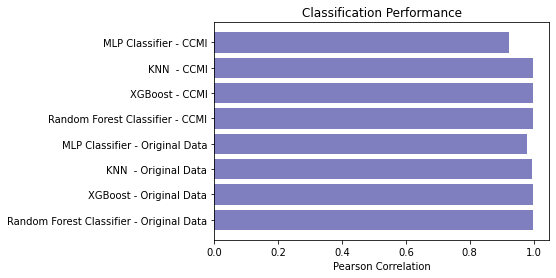

In [42]:
plt2.barh(y_pos, pcsc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Pearson Correlation')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [44]:
import joblib
filename = 'model.sav'
joblib.dump(clf1, filename)

['model.sav']

In [9]:
import joblib
filename = 'model_vot.sav'
joblib.dump(eclf2, filename)

['model_vot.sav']